# Tutorial 1 : Python basics 

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>
   
- Data manipulation in python: numpy, matplotlib, pandas
- First steps with scikit-learn

</div>

Python is a popular computer language. We will use it along with 4 libraries: numpy for array handling, pandas for time series, scikit-learn for machine learning tools and matplotlib for plotting. There are *a lot* of resources on the web: the user manual remains the primary location where you should be looking for documentation about a specific function. https://stackoverflow.com/ is also a great source of information since many people before you have already had the same question as you. A good intro to numpy: https://sebastianraschka.com/blog/2020/numpy-intro.html

Even though python is a great language, don't forget that it is an [Interpreted language](https://en.wikipedia.org/wiki/Interpreter_(computing)). That means that python can be very slow. For this reason you should 

- Rely on existing libraries when available
- Write compact code
- Avoid loops

In fact, most modern libraries deffer the heavy lifting part to compiled bits of codes which typically run much faster than your own implementation.

Last, don't forget to comment your codes.

## Numpy for array handling

Numpy is the core library when it comes to manipulating "dense" arrays of numbers and you should always use it instead of raw python lists. Numpy also comes with a couple of linear algebra routines to perform basic operations (matrix multiplication, linear systems, eigenvalue solver). However for large-scale application (and sparse matrices) we will use different libraries (like scipy).

In [1]:
import numpy as np

Vectors are first declared as a list of number and are then converted to numpy arrays. Note that python does not make the difference between row vectors and column vectors: all vectors are treated as rows.

In [57]:
x = np.array([1, 2, 3])
y = np.array(["a","b","c"])
print(x)
print(y)

[1 2 3]
['a' 'b' 'c']


Matrices are declared as an array of arrays in a similar way as vectors. Note that python is case sensitive

In [3]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In order to convert a row vector to a column vector, one must add a new dimension as shown below:

In [4]:
x_col = x[:,None]
print(x_col)
y_col = y[:,None]
print(y_col)

[[1]
 [2]
 [3]]
[['a']
 ['b']
 ['c']]


You can compute the transpose of a vector with the method `.T`. However keep in mind that the transpose of a 1d vector does not really make sense *in python*. If you want to transpose a vector in python, it must have at least two dimensions.

> ***Question***
> - Try to transpose `x` and `x_col` and check their dimensions.
- Hint: You can always check the dimensions of your array with the method `.shape`.

In [5]:
# your code here
print(x.shape)
print(np.shape(x)) # same thing as above
x_col.T

(3,)
(3,)


array([[1, 2, 3]])

In [6]:
y_col.T

array([['a', 'b', 'c']], dtype='<U1')

In [7]:
A.T # 2D matrix transpose

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

Matrix multiplication can be achieved with `np.dot`, `np.matmul`, `@` or `np.einsum`.
> ***Question***
> - Pick the one you prefer to compute $\mathbf A \mathbf x$, $\mathbf x \mathbf x^\top$, and $\mathbf x^\top \mathbf x$.

- Hint: Did I already warn you about transposing 1d vectors in python?
- Hint2: Einsum is the most advanced function but also the most complicated. [This tutorial](https://ajcr.net/Basic-guide-to-einsum/) will tell you more about it
- Hint3: you can add a question mark to the name of the function to access the help: `np.einsum?`

With the  vectors and matrices defined above, you should get:
$\mathbf A \mathbf x = [14, 32, 50]^\top$

\begin{align}
 \mathbf x \mathbf x^\top = &= \begin{bmatrix}
    1 & 2 & 3\\
    2 & 4 & 6\\
    3 & 6 &  9 \\
  \end{bmatrix}
\end{align}

and 
$\mathbf x^\top \mathbf x = 14$

In [8]:
#Finding Ax
print(A,"x",x)
print("AX using np.dot=", np.dot(A,x))
print("AX using np.matmul=", np.matmul(A,x))
print("AX using np.einsum=", np.einsum('ij,j->i',A,x)) #i=row, j=column, A=ij(2D), x=j(1D) we repeat j as we want to multiply with columns of x, it multiplies every row of A with every column of x
print("AX-additional_1 using np.einsum=", np.einsum('ij,i->i',A,x)) # I dont know
print("AX-additional_2 using np.einsum=", np.einsum('ij,j->ij',A,x)) # it multiplies element of each row of A with each element of x row-wise.
# explanation of einsum https://stackoverflow.com/questions/26089893/understanding-numpys-einsum
# einsum is a power tool for multiplication of matrices

[[1 2 3]
 [4 5 6]
 [7 8 9]] x [1 2 3]
AX using np.dot= [14 32 50]
AX using np.matmul= [14 32 50]
AX using np.einsum= [14 32 50]
AX-additional_1 using np.einsum= [ 6 30 72]
AX-additional_2 using np.einsum= [[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]


In [9]:
# your code here
print(x_col,x_col.T)
np.dot(x_col,x_col.T)

[[1]
 [2]
 [3]] [[1 2 3]]


array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [10]:
np.dot(x_col.T,x_col)

array([[14]])

You can access the first element of an array with `x[0]` and the last element with `x[-1]`. You can also select a subset using slices like `x[0:2]` (or `x[:2]`). Be careful that the last index of the slice is not part of the subset.

> ***Question***
> - Can you select the last two element of the vector $\mathbf x$ with negative indices?

In [11]:
# your code here
x_col[-3:]

array([[1],
       [2],
       [3]])

Numpy comes with the standard math function `np.exp`, `np.sqrt`, `np.sin`. Each of these functions applied to an array is applied element-wise. For instance `A**2` raises each element of `A` to the power of 2.

> ***Question***
> - Is `A*A` the same as `A@A`?

In [12]:
# your code here
print(A)
print(A*A) # square of all the elements
print(A@A) # This if matrix multiplication 
print(A*A == A@A) 
print(np.dot(A,A) == A@A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[False False False]
 [False False False]
 [False False False]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


### Broadcasting

In python, we can add, subtract, multiply, (etc.) arrays elementwise. In this context arrays have to be of the same size. But when we do `A+1`, we add the scalar `1` to each element of the array `A`. This type of operation is called [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). 

> ***Question***
> - Check the broadcasting rules (link above) and add `x` to each column of `A`

You should get
\begin{bmatrix}
    2 & 3 & 4\\
    6 & 7 & 8\\
    10 & 11 &  12 \\
  \end{bmatrix}



In [13]:
# your code here
print(A,x)
print(A+x) # it adds x row wise with each row of A
A+x == x+A

[[1 2 3]
 [4 5 6]
 [7 8 9]] [1 2 3]
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Generating arrays

Empty arrays can be generated with `np.zeros`. We can also generate arrays with [random numbers](https://numpy.org/doc/stable/reference/random/index.html). The most useful functions are
- [`np.random.rand`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) (uniform distribution)
- [`np.random.randn`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) (standard normal distribution) 
- [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) (normal distribution)

> ***Question***
> - Generate 2 arrays $v_1$ and $v_2$ with $N=500$ observations following the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) $\mathcal N (\mu_1,\sigma_1^2)$ for $v_1$ and $\mathcal N (\mu_2,\sigma_2^2)$ for $v_2$, with $\mu_1 = 2$, $\mu_2 = 1$, $\sigma_1 = 5$, $\sigma_2 = 1$

In [94]:
mu1 = 2
mu2 = 1

sigma1 = 5 #std deviate  - (sigma1)2 = variance1(v1)
sigma2 = 1

N = 500

# your code here
# random.normal(loc=0.0, scale=1.0, size=None) Syntax
v1 = np.random.normal(mu1, sigma1, size= N)
v2 = np.random.normal(mu2, sigma2, size = N)

> ***Question***
> - Compute the mean of each array.
> - How does it compare to $\mu_1$ and $\mu_2$? Can you explain?

In [95]:
# your code here
print(v1.mean())
v1.mean() == mu1

1.9773312504054894


False

In [96]:
print(v2.mean())
v2.mean() == mu2

1.0335136701259575


False

> ***Question***
> - Do you think $v_1$ and $v_2$ are correlated?
> - Can you compute the actual covariance between $v_1$ and $v_2$ with `np.cov`?
> - Recall the definition of the covariance between two variables. [Hint](https://en.wikipedia.org/wiki/Covariance)
> - What is the expected covariance matrix in terms of $\sigma_1$ and $\sigma_2$
> - Do you recognize the array `Cv` defined below?

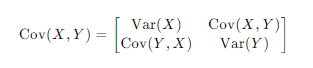

In [25]:
# your code here
Cv = np.array([[sigma1**2, 0], [0,sigma2**2]]) # Indirect way of creating covariance matrix
print(Cv)

[[25  0]
 [ 0  1]]


In [97]:
np.cov(v1,v2) #direct way of creating covariance matrix 
# off diagnol elements give the correlation as it is very close to 0 therefore, correlation = covariance/variance-- therefore v1 and v2 are not correlated

array([[24.77095545, -0.11565508],
       [-0.11565508,  1.02870208]])

As you just saw, $v_1$ and $v_2$ are not correlated. Let's apply the linear transformation
\begin{align}
w_1& = \cos \theta v_1 - \sin \theta v_2\\
w_2& = \sin \theta v_1 + \cos \theta v_2
\end{align}
That you can also write for each realization
\begin{equation}
\mathbf{w} = \mathbf{R}\mathbf{v}
\end{equation}
with $\mathbf R$ the rotation matrix
\begin{align}
 \mathbf{R} &= \begin{bmatrix}
    \cos \theta & -\sin \theta \\
    \sin \theta & \cos \theta
  \end{bmatrix}
\end{align}
and
\begin{align}
 \mathbf{v} &= \begin{bmatrix}
    v_1  \\
    v_2
  \end{bmatrix} & \quad & \mathbf{w} &= \begin{bmatrix}
    w_1  \\
    w_2
  \end{bmatrix}
\end{align}

> ***Question***
> - Create the rotation matrix `R` with $\theta=\pi/3$
> - In order to compute $\mathbf w$ it is convenient to store $\mathbf v = [v_1, v_2]$ in a matrix
`V = np.array([v1,v2])`. Compute `V`.
> - Compute `W` with one matrix multiplication. 


Remarks:
- The equations above are valid for one single observation.
- layout for `V` and `W` is the opposite as the one we adopted in class. We will adopt this new layout just for this tutorial. Take a moment to check if each observation is stored in a row or in a column.

In [103]:
# your code here
import math
from math import cos,sin,pi
v = np.array([v1,v2])
print(v)

[[ 6.21260340e+00  9.90339484e+00  2.26176561e+00  7.55593943e-01
   1.15371259e+00  3.27338595e-01  7.16329843e+00  7.52366759e+00
  -2.23029176e+00  1.39866804e+01 -1.96621170e+00  1.18543515e+00
  -2.48291017e+00 -2.61077331e+00  1.66276464e+00  5.71946806e+00
   5.75330658e+00  8.15507905e+00  3.46098156e+00  2.96185389e+00
  -2.54611273e+00  7.37286629e-01  2.15163021e+00  6.55288535e+00
   1.25847055e+01  9.58955088e+00  6.66216067e+00  5.48142399e-01
   3.08322284e+00  2.55061076e+00  1.01867115e+01  3.93529614e+00
   2.34620625e+00  9.92309260e+00  3.51435727e+00 -5.85968241e-01
  -2.14369002e+00 -4.19276602e-01 -1.57194539e+00  9.61864887e-01
   2.02447697e+00  9.82884321e-01  1.36201017e+00 -1.59897744e+00
   1.12213236e+00  1.71970329e+00  5.52128442e+00 -1.18694043e+00
  -1.44818585e-01 -7.63914198e-01  5.98683450e+00  8.47276764e+00
  -4.13806278e+00  8.46219925e+00  1.46724489e+01 -5.93158998e-01
   5.00558061e+00  3.44930353e+00 -6.10877339e-01 -2.15706400e+00
   3.78205

In [117]:
angle = pi/3
R = np.array([[math.cos(angle),-math.sin(angle)],[math.sin(angle),math.cos(angle)]])
w = np.matmul(R,v)
print(R.shape,v.shape,w.shape)
print(R)
print("w:", w)

(2, 2) (2, 500) (2, 500)
[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]
w: [[ 2.52852383e+00  4.64471449e+00  5.92328748e-01  5.08361572e-01
  -2.95520573e-01 -2.26662246e+00  2.27342333e+00  2.59388365e+00
  -4.50253449e+00  6.46881813e+00 -1.40080445e+00  1.39269043e+00
  -1.97927501e+00 -2.32963697e+00 -6.00733548e-01  8.76680202e-01
   1.92874966e+00  2.69428283e+00  7.02237260e-01  1.72412267e+00
  -2.94101527e+00  3.21444662e-01  7.52108446e-01  2.04444386e+00
   5.75535349e+00  3.21381403e+00  3.77138333e+00  3.48214557e-01
   3.21582148e-01  1.61342274e+00  4.77638817e+00  1.06663536e+00
   4.82118333e-01  3.77135926e+00  3.07854468e-01 -9.93703736e-01
  -1.31699367e+00 -2.41549839e+00 -1.37933603e+00 -5.88427532e-01
  -1.10402505e+00  3.61707712e-01 -2.94996408e-01 -2.94386104e+00
  -1.77866473e-01  3.68749094e-01  8.72363251e-01 -2.64131016e+00
  -5.59025837e-01 -6.40985713e-01  2.98019758e+00  3.01447825e+00
  -4.87044159e+00  2.61334748e+00  7.04226033e+00 -1.23189078e+

> ***Question***
> - Compute the mean of $\mathbf w = (w_1,w_2)$ with two different techniques: 
>     - direct computation with `np.mean` (be careful, you need to compute the mean along the second dimension only! Look at the documentation.)
>     - with $R$ and the mean of $\mathbf v$.

For the second method, you will have to derive the formula from the definition of $\mathbf w$

In [128]:
# your answer here
# 1st method
w_mean = w.mean(axis=1) # row wise mean
print(w_mean)

#2nd Method
v_mean = v.mean(axis=1)
print(v_mean)
w_mean_2ndMethod = np.matmul(R,v_mean)
print(w_mean_2ndMethod)


[0.09361653 2.22917593]
[1.97733125 1.03351367]
[0.09361653 2.22917593]


> ***Question***
> - Can you guess what the covariance between $w_1$ and $w_2$ will be? [Hint](https://en.wikipedia.org/wiki/Covariance#Covariance_of_linear_combinations)
> - Compute the theoretical covariance matrix $C_w$ as a function of $R$ and $C_v$ (the covariance matrix of $\mathbf v$) [Hint](https://en.wikipedia.org/wiki/Covariance#Auto-covariance_matrix_of_real_random_vectors)
> - Compute the covariance matrix of $\mathbf w$ with 2 methods: 
>      - with `np.cov`, 
>      - with `R` and `Cv`
> - Comment your results

You should get
\begin{align}
C_w &=\begin{bmatrix}
    7 & 10.4\\
    10.4 & 19
\end{bmatrix}
\end{align}



In [129]:
# your answer here
w 
w1 = w[0]
w2 = w[1]
np.cov(w1,w2)


array([[ 7.06442565, 10.33852482],
       [10.33852482, 18.73523188]])

## Matplotlib for plotting

To visualize data, matplotlib is the reference tool. Matplotlib is also what runs behind the scene of high level python libraries (pandas, xarray) and so knowing the basics will also be useful there.

In [32]:
import matplotlib.pyplot as plt

> ***Question***
> - Can you visualize the data set `V` that we generated earlier. you can either pass the two variables to the function `plt.plot` in order to plot $v_2$ as a function of $v_1$ or we can use the function `plt.scatter`. Don't forget to 
>    - adjust the type and size of markers [Hint](https://matplotlib.org/stable/api/markers_api.html)
>    - adjust the axis so that both axis are equally stretched [Hint](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html).
>    - add labels [Hint](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html)

Text(0, 0.5, 'v2')

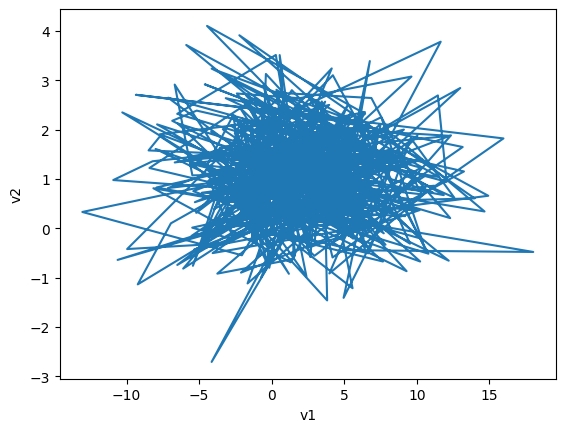

In [136]:
#your answer here
import matplotlib.pyplot as plt
plt.plot(v1,v2)
plt.xlabel("v1")
plt.ylabel("v2")

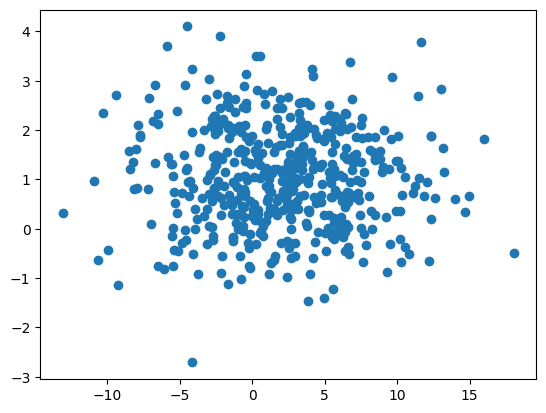

In [138]:
plt.scatter(v1,v2,
           marker=)

> ***Question***
> - Do you *see* the lack of correlation between $v_1$ and $v_2$?

Let's analyze the probability density function (pdf) of this data set. The function [`plt.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) provides a discrete estimate of the pdf along a given dimension.

> ***Question***
> - Use `plt.hist` to compute and plot an estimation of the pdf of $w_1$ and $w_2$. Don't forget to adjust the number of bins.
> - ***(Optional)*** Compare it with the analytical probability density function of $w_1$ and $w_2$? ([Hint](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables))



In [18]:
# your code here

We can also get a quick overview of the statistical distribution of the data with [box plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

> ***Question***
> - What is the meaning of a box plot?
> - Try it on $w_1$

In [19]:
# your code here

> ***Question (optional)***
> - Use `np.histogram2d` to compute the 2-dimensional pdf
> - (***) On a single plot, superimpose the cloud of points and the contour lines of the pdf.

In [20]:
# your answer here

In [21]:
# Solution
# The (x,y) indexing is tricky: use 2 different number of bins in each direction
#psi, xedge, yedge = np.histogram2d(W[0,:],W[1,:],bins=[5,10])

#x1 = 0.5*(xedge[1:] + xedge[:-1])
#y1 = 0.5*(yedge[1:] + yedge[:-1])

#xg,yg = np.meshgrid(x1,y1,indexing='ij')

#plt.plot(W[0,:],W[1,:],'.', alpha=0.1)
#plt.contour(xg,yg,psi)

#plt.axis('equal')

> ***Question (Optional)***: 
> - The [Central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) states that If $X_1, X_2,\dots ,X_{N}$ are $N$ random samples drawn from a population with overall mean  $\mu$ and finite variance $\sigma ^{2}$ $\bar {X}_{N}$ is the sample mean, then the limiting form of the distribution, $Z=\lim _{N\to \infty }{\sqrt {N}}{\left({\frac {{\bar {X}}_{N}-\mu }{\sigma }}\right)}$ is a standard normal distribution. Can you propose an visual illustration of this theorem?

In [22]:
# your answer here

## Pandas for advanced array manipulation

Compared to numpy which already handles arrays of numbers, Pandas essentially handles **metadata**. This will allow you to use predefined functions in pandas especially when it comes to time series manipulations. 

Pandas has a lot of other nice features like

- Intuitive handling of missing data (NaN)
- Input/output in many formats
- Simplified plotting procedures (labels, axes, etc. are added automatically)
- Better management of the memory

### Data download

If you are running a standalone version of the notebook, you will have to download the data first by running:

`!mkdir data`

`!wget -P data/ https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/daily/daily_in_situ_co2_mlo.csv`

and in case wget is not installed, you can install it with

!pip install wget

!python -m wget -o 'data/daily_in_situ_co2_mlo.csv' https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/daily/daily_in_situ_co2_mlo.csv
 

We are going to explore the basic functionalities of pandas with the historical CO2 measurements taken at Mona Loa also known as the [Keeling curve](https://en.wikipedia.org/wiki/Keeling_Curve). The data can be downloaded at [scrippsco2.ucsd.edu](http://scrippsco2.ucsd.edu) and we are going to analyze the daily output.

Take a moment to inspect the file that is located here `data/daily_in_situ_co2_mlo.csv` (either use a text editor or navigate within jupyter to open the file). Read the header to understand what is the data set about (you may have to investigate more to know about the units). 

> **Question**
> - Why is there NaN in the data set?

In [23]:
import pandas as pd

We are going to use the function [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to import the data in python. It is very important to do a clean import of the data so that we can work efficiently afterwards. Pay extra attention to 
- the commented part in the header (hint: `comment`)
- add a name to each column. Use the names **year**, **month**, **day** for the corresponding columns. This way, pandas will directly recognize what they are (hint: `names`)
- pandas handles spaces in cvs files in a very specific way: you may need to adjust its behavior with `skipinitialspace`.

Use `pd.read_csv` to load the content of `data/daily_in_situ_co2_mlo.csv` into a DataFrame called `df`.

In [24]:
df = pd.read_csv('data/daily_in_situ_co2_mlo.csv', comment='%',names=["Year", "Month", "Day", "CO2", "NB", "scale"], skipinitialspace=True)

To access your data, you will need to know the metadata, i.e. the label of each column in the csv file (in this case provided by yourself). You can get a quick overview of your data by typing `df.head()` or `df.describe()`. You will see that the Dataframe `df` can be treated like a spreadsheet with labeled columns and entries for each column. You can view the labels with `df.columns` and the rows indices with `df.index`. Make sure you understand the type of each column of the dataset with `df.dtypes`. 

In [25]:
#look at the data set here

You can select a column of the DataFrame by passing one name to `df` like `df["Year"]`. You can also select multiple columns by passing a list of names `df[["Year", "Month"]]`. To select specific rows, you need to use the metho `df.loc[i0:i1]` with `i0` and `i1`, the lower and upper bounds of the index. In our case we did not provide labels for the index so pandas automatically numbered the rows with a simple counter `0,1,...`. In that case, `i0` and `i1` are integers but we will see later that `i0` and `i1` can also be two dates (if the index is a date).

> ***Question***
> - Create a new DataFrame that contains only the first 100 entries and with the columns `Year` and `CO2` only.

In [26]:
# your answer here

One killer feature of pandas is the way it handles time series. In order to use the full potential of such tool, one need to change the index to a date that is recognized by pandas. We use [`pd.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to combine the information in the year, month and day columns of the dataframe. `pd.to_datetime` handles several formats as input and you should be careful to use the correct input format. However, because we carefully chose the name of the columns when we imported the file, we can directly assemble the columns `Year`, `Month`, `Day` to create a new datetime object. You can follow the method in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#assembling-datetime-from-multiple-dataframe-columns) to re-allocate `df.index` to a `datetime` type variable. Henceforth, we will use `df.index` to access the time dimension.

In [27]:
#your answer here

> ***Question (Optional)***
> - Note that one could have done this operation directly while reading the data. Use `parse_dates` in `pd.read_csv` to create a datetime object in `df`. Try it.

In [28]:
# your code here

Now `df.index` contain [Timestamp](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html)s. You can quickly access the day, month, year of the records by using `df.index.day`, `df.index.month` `df.index.year` (etc. see documentation). You can also construct time intervals (or [timedetla](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html)s) by subtracting two timestamps

> ***Question***
> - Subtract the first index to the last index to know how many days are in this data set

In [29]:
#your answer here

You can now select specific rows of your dataset by passing dates to the `.loc[]` method, as in `.loc[date0:date1]`. The two dates `date0` and `date1` can be written as strings in the format `'YYYY-MM-DD'` (e.g. `'2020-09-20'`) or simply `'YYYY-MM'`. 

If `date0` is only `'2020-09'` (you are missing the days), Pandas will interpret it as the first day of September 2020. Note that Pandas can also interpret `'2020-09'` as the whole month of September 2020 if this is the only argument as in `.loc[date0]`.

> ***Question***
> - Select the whole month of September 2020 with two different methods


In [30]:
#your code here

Pandas has built-in plotting features that are based on matplotlib. Since you now master matplotlib, you will find it very easy to plot data within pandas. 

> ***Question***
> - Plot the CO2 time series as a function of time. (Hint: select the column of interest in df and simply apply the method `.plot()`)

In [31]:
# your answer here

The CO2 curve is increasing. This is not really a surprised isn't it?. However, we also notice wiglly patterns superimposed to this trend. Are we looking at noisy data are does it have a physical meaning?

> ***Question***
> - In order to get a closer look, can you plot only 2 years of the CO2 time series between Jan 1st 2000 and Jan 1st 2002?

In [32]:
#your answer here

So there seem to be a lot of variability and many missing data in this data set. We can try to average all available data for each single year that we have. That way we will probably see a smoother curve. The [`resample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) function is here to create a new time series with the desired sampling frequency. The acronym for standard time intervals are listed in the [Time series documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). You need to either add the method `.mean()` or `.sum()` to the resampled data to indicate how to treat the data in the resampling interval.

> ***Question***
> - Plot the yearly average evolution of the CO2 concentration.

In [33]:
#your answer here

These wiggles are not random but are the actual annual cycle of the data.
> ***Question (Optional)***
> - Use the method `.groupby` to plot the annual cycle
> - Discuss the physical origin of this anual cycle

In [34]:
#your answer here

## Scikit-learn for data analysis

[Scikit-learn](https://scikit-learn.org/) will be our toolbox for all statistical analysis. It provides the most popular machine learning algorithm, is well documented and has an active user community. Scikit learn does not work well with missing data. So in order to have a smooth transition between pandas and scikit-learn, it is convenient to create a copy of your DataFrame without any `NaN`. Make sure you use (and understand) the [`.copy()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) method to create the new array because we are going to make modification to this new DataFrame. You can call this new DataFrame `dfv`.

In [35]:
dfv = df.dropna().copy()

Because we cannot do a linear regression with dates as indices, we need to create an additional column that contains the day number since the begining of the dataset. Remember how we worked with timedelta (and broadcasting) above?

> ***Question***
> - Can you create this new column and name it `counter`?

*Be careful that this new variable must have dtype int (or float) and not a timedelta. (Hint: look at the [attributes of timedelta](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html#attributes))*

In [36]:
#dfv["counter"] = 

We are now ready to use the [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.

In [37]:
from sklearn.linear_model import LinearRegression

We are first going to [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) the data. As explained in the documentation, this function takes at least two arguments: the predictors and the observations. Predictors must be a 2d array of shape (n_samples, n_features), **even if there is only ONE feature**. One simple way to achieve this is to select a list of only one variable in the DataFrame (i.e. `dfv[["counter"]]`, note the usage of double brackets here).

> ***Question***
> - Create the input variable `X` (day since first record) and the output variable `y` (CO2 concentration)
> - Perform the linear regression and put the output in the variable `reg`.

In [38]:
#X = 
#y  
#reg = 

> ***Question***
> - What is the value of the regression coefficient?
> - What is its physical meaning?

In [39]:
#your code here

> ***Question***
> - Use the method `.predict` to construct the predicted value at all observation times and add it to the `dfv` DataFrame.

In [40]:
#dfv["CO2_fit"] =

> ***Question***
> - Plot the observed value along with your prediction on a single plot.

In [41]:
#your code here

It is now super easy to compute the co2 growth rate in ppm/year for several time periods.
> ***Question***
> - Perform 2 linear regressions: one between 1960 and 1980 and one between 2000 and 2020 and compare how the growth rate evolved over time.
> - Can you give an estimate of the CO2 concentration in 2050?


In [42]:
#reg_2000 = LinearRegression().fit(dfv[["counter"]][dfv.index.year>2000], dfv["CO2"][dfv.index.year>2000])
#reg_1960 = LinearRegression().fit(dfv[["counter"]][dfv.index.year<1980], dfv["CO2"][dfv.index.year<1980])

#print("The growth rate changed from {}ppm/day to {}ppm/day from 1970 to 2010".format(reg_1960.coef_,reg_2000.coef_))

## rough estimate of the number of days between 1960 and 2050 (90 years x 365 days)
#nday_2050 = 90*365
#predict_co2_2050 = reg_2000.intercept_ + nday_2050*reg_2000.coef_
#print(f"With the most recent growth rate, there will be {predict_co2_2050} ppm of CO2 in 2050"

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>